### Select the Right Threshold values using ROC Curve

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




In [23]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9836833333333334


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.31, 0.69]])

#### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### Now we will focus on selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9848444444444444


In [13]:
pd.concat(pred,axis=1)

0         1         2    3
0    0.97  0.991861  0.559186  1.0
1    0.03  0.000008  0.463282  0.0
2    0.97  0.966929  0.538202  0.8
3    0.93  0.761539  0.509875  0.8
4    0.60  0.779443  0.490344  0.4
..    ...       ...       ...  ...
595  0.01  0.024239  0.461121  0.0
596  0.05  0.000003  0.441377  0.0
597  0.98  0.984385  0.532403  1.0
598  0.01  0.001147  0.441720  0.2
599  0.99  0.989540  0.559890  0.8

[600 rows x 4 columns]

In [14]:
final_prediction

0      0.880262
1      0.123323
2      0.818783
3      0.750353
4      0.567447
         ...   
595    0.123840
596    0.122845
597    0.874197
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [27]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
print(thresholds)

[1.9109413  0.9109413  0.90672166 0.90577475 0.80806516 0.8080558
 0.7994465  0.79912833 0.77659273 0.77571156 0.76547605 0.76537124
 0.72152563 0.72137362 0.71347576 0.70643711 0.65192282 0.64993537
 0.62366701 0.60364346 0.60029968 0.59425354 0.59396627 0.59300386
 0.58827749 0.58736186 0.58245356 0.57639283 0.56212652 0.55969563
 0.55899047 0.55627948 0.52115858 0.49366892 0.46169266 0.43544916
 0.4321034  0.40341982 0.39379719 0.35245613 0.35086612 0.23619003
 0.23390421 0.2219954  0.22146893 0.20707968 0.20598417 0.12284501
 0.1228351  0.10498954]


In [29]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

thresholds  accuracy
35    0.435449  0.961667
36    0.432103  0.960000
34    0.461693  0.960000
33    0.493669  0.958333
32    0.521159  0.956667

In [17]:
accuracy_ls

thresholds  accuracy
35    0.435449  0.961667
36    0.432103  0.960000
34    0.461693  0.960000
33    0.493669  0.958333
32    0.521159  0.956667
37    0.403420  0.955000
38    0.393797  0.953333
31    0.556279  0.951667
30    0.558990  0.950000
29    0.559696  0.950000
28    0.562127  0.948333
27    0.576393  0.946667
25    0.587362  0.945000
26    0.582454  0.945000
23    0.593004  0.945000
21    0.594254  0.943333
22    0.593966  0.943333
24    0.588277  0.943333
19    0.603643  0.941667
20    0.600300  0.941667
39    0.352456  0.940000
18    0.623667  0.940000
40    0.350866  0.938333
17    0.649935  0.938333
16    0.651923  0.936667
15    0.706437  0.920000
14    0.713476  0.918333
13    0.721374  0.913333
12    0.721526  0.911667
41    0.236190  0.876667
42    0.233904  0.875000
43    0.221995  0.865000
44    0.221469  0.863333
11    0.765371  0.861667
10    0.765476  0.860000
45    0.207080  0.850000
46    0.205984  0.848333
9     0.775712  0.846667
8     0.776593  0.845000
7     0.799128  0.816667
6     0.799447  0.815000
5     0.808056  0.801667
4     0.808065  0.800000
47    0.122845  0.663333
48    0.122835  0.661667
3     0.905775  0.513333
2     0.906722  0.511667
49    0.104990  0.501667
1     0.910941  0.500000
0     1.910941  0.500000

In [30]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

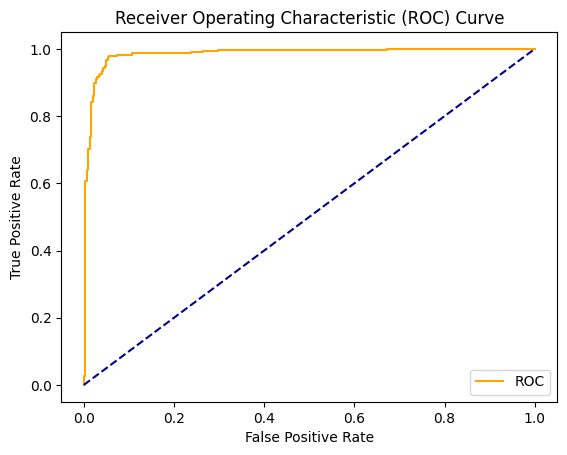

In [19]:
plot_roc_curve(fpr,tpr)